# Emotion Classification Using Random Forest: Train, Validation, and Test Evaluation

In this Colab notebook, we apply the **Random Forest Classifier** to classify emotions using a balanced, augmented dataset. The dataset is divided into **training**, **validation**, and **testing** subsets to ensure robust evaluation of the model's performance on unseen data.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into training (60%), validation (20%), and testing (20%) subsets.
   - Training data is used to train the Random Forest model, validation data to check interim performance, and test data to assess final performance.

2. **Text Vectorization:**
   - Text data is transformed into numerical features using **TF-IDF Vectorization**, allowing the Random Forest model to process the textual input.

3. **Model Training and Evaluation:**
   - Random Forest Classifier is trained with default parameters.
   - Performance is evaluated on:
     - Training data: To verify the model's ability to learn effectively.
     - Validation data: To assess its generalization capability.
     - Test data: To measure performance on unseen examples.

4. **Confusion Matrix Analysis:**
   - A confusion matrix visualizes the model's predictions on the test set, providing insights into its classification strengths and weaknesses.

This notebook demonstrates the application of ensemble learning methods like Random Forest to emotion classification tasks, providing a strong baseline for further optimization or comparison.


# Step 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the combined dataset

In [ ]:
# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split the Data into Train and Test Sets

In [ ]:
# Split into train, validation, and test sets (60%-20%-20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Text Vectorization using TF-IDF

In [ ]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

# Step 5: Train and Evaluate Models using the augmented balanced dataset


Training Accuracy: 0.984799582816552
Classification Report on Training Data:
               precision    recall  f1-score   support

       anger       0.99      0.98      0.99     12530
     boredom       1.00      0.99      0.99      9899
   confusion       0.99      0.99      0.99     12650
     disgust       0.99      0.99      0.99     13763
        fear       0.99      0.99      0.99     13012
       guilt       0.98      0.98      0.98     13678
         joy       0.94      0.98      0.96     16533
     neutral       0.99      0.98      0.99     12356
     sadness       0.98      0.98      0.98     14313
       shame       0.99      0.98      0.99     12923
    surprise       1.00      1.00      1.00     10247

    accuracy                           0.98    141904
   macro avg       0.99      0.99      0.99    141904
weighted avg       0.99      0.98      0.98    141904


Validation Accuracy: 0.7927950783281538
Classification Report on Validation Data:
               precision 

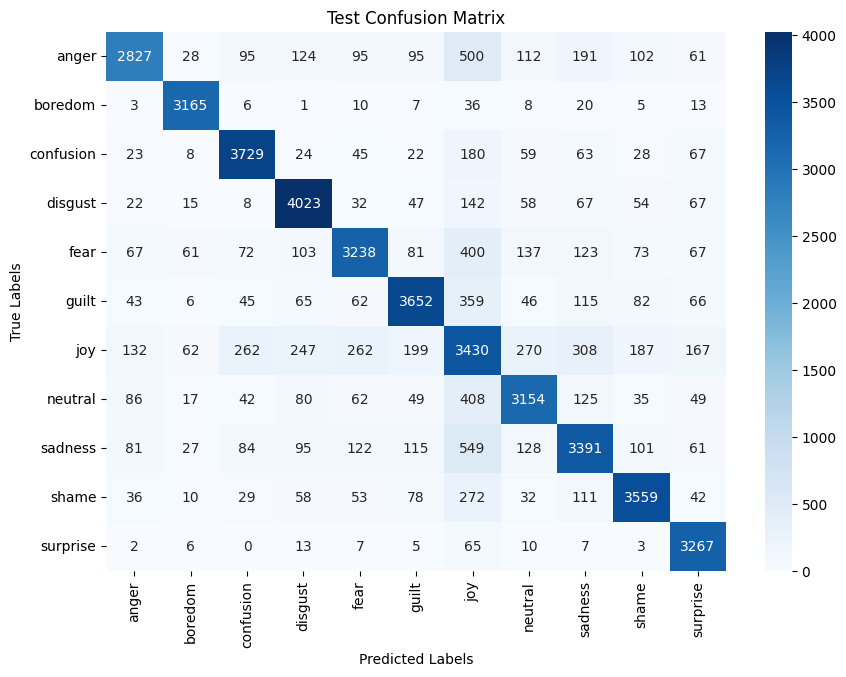

In [ ]:
# Train RandomForestClassifier with default parameters
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Validate the model
y_val_pred = rf_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation Accuracy:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Test the model
y_test_pred = rf_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y), title="Test Confusion Matrix")
